# ***Timeseries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [3]:
# Load the CSV file
file_path = ('/content/sample_data/exchange_rate.csv')
exchange_rate_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(exchange_rate_df.head())

# Display column names to check for 'description' or similar columns
print(exchange_rate_df.columns)

               date  Ex_rate
0  01-01-1990 00:00   0.7855
1  02-01-1990 00:00   0.7818
2  03-01-1990 00:00   0.7867
3  04-01-1990 00:00   0.7860
4  05-01-1990 00:00   0.7849
Index(['date', 'Ex_rate'], dtype='object')


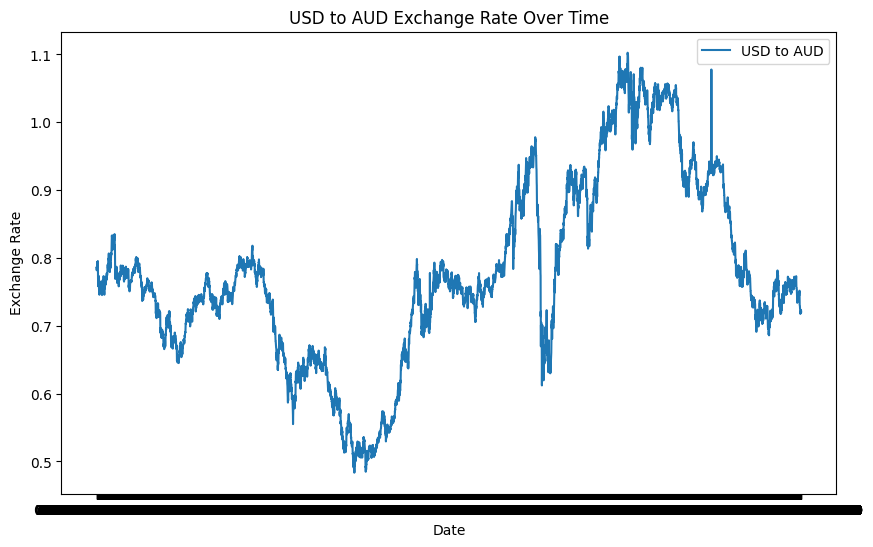

<ipython-input-5-b6b4d1fbd59c>:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Handle missing values by forward fill method


ADF Statistic: -1.6649941807382342
p-value: 0.4492327353597477
ADF Statistic (after differencing): -99.39343120118632
p-value (after differencing): 0.0


In [5]:
# Load the dataset
data_path = '/content/sample_data/exchange_rate.csv'
df = pd.read_csv(data_path, parse_dates=['date'], index_col='date')

# Initial Exploration
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='USD to AUD')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Data Preprocessing
df = df.fillna(method='ffill')  # Handle missing values by forward fill method

# Check for stationarity using Augmented Dickey-Fuller test
result = adfuller(df['Ex_rate'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Differencing the data if not stationary
df_diff = df.diff().dropna()

# Re-check stationarity after differencing
result = adfuller(df_diff['Ex_rate'])
print(f'ADF Statistic (after differencing): {result[0]}')
print(f'p-value (after differencing): {result[1]}')

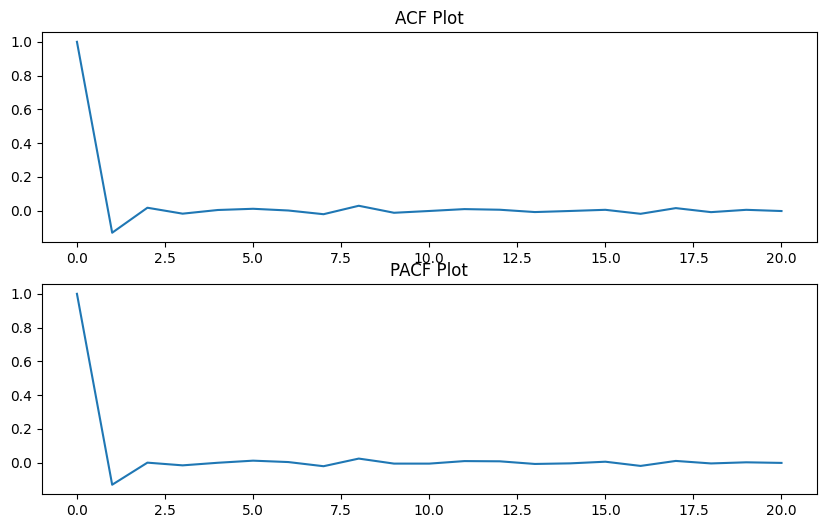

In [8]:
# ACF and PACF plots to estimate initial ARIMA parameters
plt.figure(figsize=(10, 6))
plt.subplot(211)
plt.plot(acf(df_diff['Ex_rate'], nlags=20))
plt.title('ACF Plot')
plt.subplot(212)
plt.plot(pacf(df_diff['Ex_rate'], nlags=20))
plt.title('PACF Plot')
plt.show()

In [9]:
from statsmodels.tsa.arima.model import ARIMA # Import the correct ARIMA class

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Fri, 13 Dec 2024   AIC                         -56102.322
Time:                        12:15:38   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

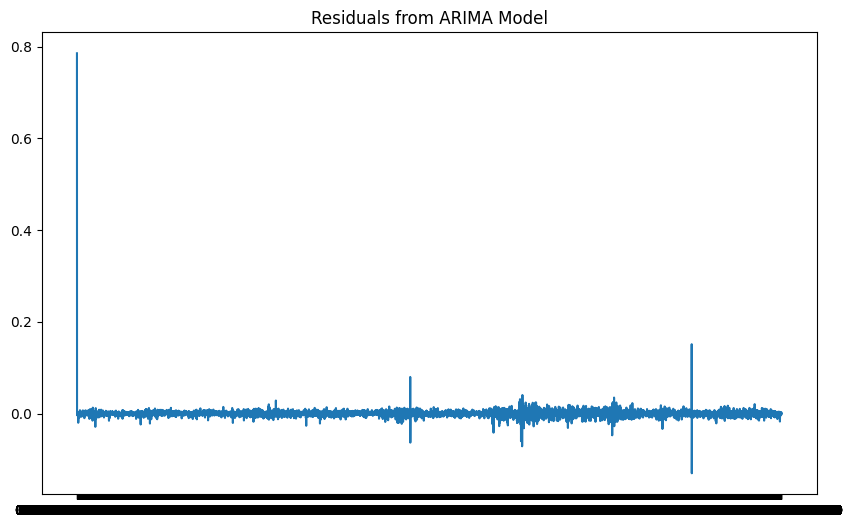

In [12]:
# Fit ARIMA model
model_arima = ARIMA(df['Ex_rate'], order=(1, 1, 1))
results_arima = model_arima.fit()
print(results_arima.summary())

# Diagnostics
plt.figure(figsize=(10, 6))
plt.plot(results_arima.resid)
plt.title('Residuals from ARIMA Model')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


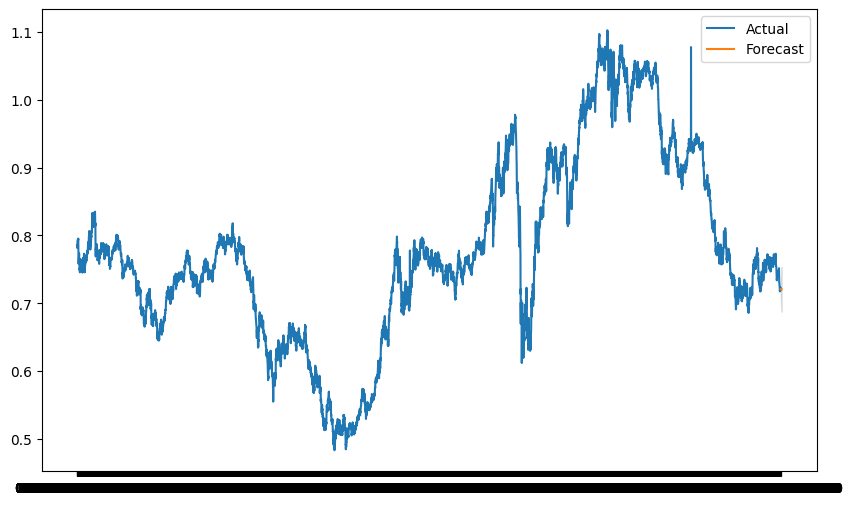

In [13]:
# Forecasting
forecast_result = results_arima.get_forecast(steps=10)
forecast_arima = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(forecast_arima.index, forecast_arima, label='Forecast')
plt.fill_between(forecast_arima.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='k', alpha=0.1)
plt.legend()
plt.show()

<ipython-input-14-2fb6fe525432>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


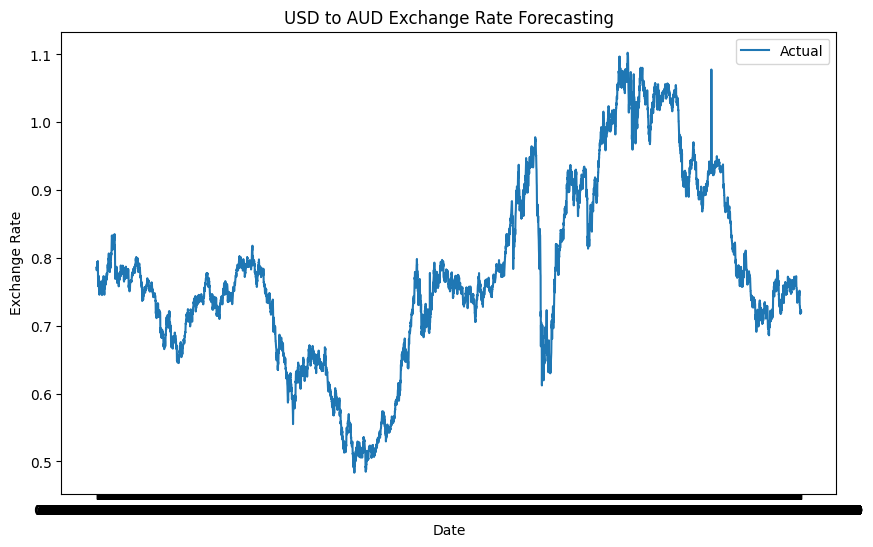

In [14]:
# Data Preprocessing (fill missing values, if any)
df = df.fillna(method='ffill')  # Forward fill

# Fit Exponential Smoothing model
model_exp = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal=None)
results_exp = model_exp.fit()

# Forecasting
forecast_steps = 10
forecast_exp = results_exp.forecast(steps=forecast_steps)

# Generate date range for forecasting
last_date = pd.to_datetime(df.index[-1])  # Ensure last_date is a Timestamp
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Ensure forecast_dates are naive datetime objects
forecast_dates = forecast_dates.tz_localize(None)

# Plotting actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='Actual')
#plt.plot(forecast_dates, forecast_exp, label='Forecast')
plt.title('USD to AUD Exchange Rate Forecasting')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [15]:
# Compute Error Metrics
y_true = df['Ex_rate'][-10:]
y_pred_arima = forecast_arima[:10]
y_pred_exp = forecast_exp[:10]

mae_arima = mean_absolute_error(y_true, y_pred_arima)
rmse_arima = sqrt(mean_squared_error(y_true, y_pred_arima))
mape_arima = np.mean(np.abs((y_true - y_pred_arima) / y_true)) * 100

mae_exp = mean_absolute_error(y_true, y_pred_exp)
rmse_exp = sqrt(mean_squared_error(y_true, y_pred_exp))
mape_exp = np.mean(np.abs((y_true - y_pred_exp) / y_true)) * 100

print(f'ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}')
print(f'Exponential Smoothing - MAE: {mae_exp}, RMSE: {rmse_exp}, MAPE: {mape_exp}')

ARIMA - MAE: 0.001556771200434226, RMSE: 0.0018425706107113402, MAPE: nan
Exponential Smoothing - MAE: 0.001574070641361358, RMSE: 0.0018519598744416396, MAPE: nan
